In [ ]:
# faire des nuages de mots
!pip install wordcloud
# retirer les accents
!pip install unidecode
# correction orthographique
!pip install pyenchant
# chargement de nltk
!pip install stop_words
!pip install nltk
# traitement d'image
!pip install Pillow
!pip install gensim
# libraririe nlp
!pip install spacy
import spacy
!python -m spacy download fr_core_news_sm
# visulaisation LDA
!pip install pyLDAvis

## Import data

In [2]:
import os
os.getcwd()

'/home/jovyan/work/analyse_text_prog/tutos_python/text_mining'

In [4]:
import pandas as pd
data = pd.read_csv('programmes_premier_tour.csv',sep=";", encoding = "UTF-8", quotechar= '"')
print(data.columns)
data

Index(['Candidat', 'tendance', 'programme'], dtype='object')


,Candidat,tendance,programme
0,Arthaud,Ext.Gauche,"Travailleuses, travailleurs, En avril 2020, pe..."
1,Dupont-Aignan,Droite,"CHOiSiR LA LIBERTE Depuis des mois, les médias..."
2,Poutou,Ext.Gauche,L'URGENCE ANTICAPITALISTE NOS VIES VALENT PLU...
3,Le Pen,Ext.Droite,ÉLECTION PRÉSIDENTIELLE 10 ET 24 AVRIL 2022 MA...
4,Hidalgo,Cent.Gauche,Anne Hidalgo ENSEMBLE CHANGEONS D'AVENIR Elect...
5,Pécresse,Droite,ÉLECTION PRÉSIDENTIELLE / 10 ET 24 AVRIL 2022 ...
6,Zemmour,Ext.Droite,POUR QUE LA FRANCE RESTE LA FRANCE ÉRIC ZEMMOU...
7,Macron,Cent.Droit,Nous tous Emmanuel Macron avec vous ÉLECTION P...
8,Lasalle,Centre,La France authentique JEAN LASSALLE Élection p...
9,Roussel,Gauche,FABIEN Election PRÉSIDENTIELLE 1O &. 24 AVAIL ...


## Nettoyage des programmes

### Retrait des accents

In [5]:
from unidecode import unidecode

def remove_accent(s):
    s = unidecode(s)
    return(s)

data['prog_ss_acc'] = data['programme'].apply(lambda x:remove_accent(str(x)))
print(data.prog_ss_acc[0][:200])
print(data.prog_ss_acc[1][:200])

Travailleuses, travailleurs, En avril 2020, pendant le premier confinement, Macron expliquait qu'il faudrait se rappeler que le pays avait tenu grace a celles et ceux << que nos economies reconnaissen
CHOiSiR LA LIBERTE Depuis des mois, les medias et les sondages veulent vous imposer leur president, mais c'est a vous de choisir le votre. En democratie, c'est au peuple de decider et a lui seul. Dans


### Retrait des ponctuations et des chiffres

In [6]:
import re

def remove_punctuation(s):
    s = re.sub(r'[^A-Za-z]',' ',str(s))
    return(s)

data['prog_ss_punc'] = data['prog_ss_acc'].apply(lambda x:remove_punctuation(str(x)))
data.prog_ss_punc[0][:200]

'Travailleuses  travailleurs  En avril       pendant le premier confinement  Macron expliquait qu il faudrait se rappeler que le pays avait tenu grace a celles et ceux    que nos economies reconnaissen'

### Tout en minuscule et réduction des espaces

In [8]:
def tolower(s):
    s = ' '.join(s.lower().split())
    return(s)
    
data['prog_minus'] = data['prog_ss_punc'].apply(lambda x:tolower(str(x)))
data.prog_minus[0][:200]

'travailleuses travailleurs en avril pendant le premier confinement macron expliquait qu il faudrait se rappeler que le pays avait tenu grace a celles et ceux que nos economies reconnaissent et remuner'

### Retrait des mots outils (stopwords)

In [9]:
import nltk
nltk.download('punkt')

from stop_words import get_stop_words
import unicodedata
from nltk.tokenize import word_tokenize

stopwords = get_stop_words('french')   
stopwords = [unicodedata.normalize('NFKD',m).encode('ASCII', 'ignore').decode() for m in stopwords]
print(stopwords)

['a', 'ai', 'aie', 'aient', 'aies', 'ait', 'alors', 'as', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'aux', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayez', 'ayons', 'bon', 'car', 'ce', 'ceci', 'cela', 'ces', 'cet', 'cette', 'ceux', 'chaque', 'ci', 'comme', 'comment', 'd', 'dans', 'de', 'dedans', 'dehors', 'depuis', 'des', 'deux', 'devoir', 'devrait', 'devrez', 'devriez', 'devrions', 'devrons', 'devront', 'dois', 'doit', 'donc', 'dos', 'droite', 'du', 'des', 'debut', 'du', 'elle', 'elles', 'en', 'encore', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eumes', 'eut', 'eutes', 'faire', 'fais', 'faisez', 'fait', 'faites', 'fois', 'font', 'force', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fumes', 'fut', 'futes', 'haut', 'ho

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
stopwords = stopwords + ['c','s','h','toute','celle','ceux','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche','etre','pendant','apres','selon','plus','entre','autre','autres']

In [28]:
def remove_stopwords(s):
    s = [w for w in word_tokenize(s) if w not in stopwords]
    s = ' '.join(s)
    return(s)

data['prog_ss_stopw'] = data['prog_minus'].apply(lambda x:remove_stopwords(x))
data.prog_ss_stopw[0][:200]

'travailleuses travailleurs avril premier confinement macron expliquait faudrait rappeler pays tenu grace celles economies reconnaissent remunerent mal ans tard personnel hopitaux ehpad aides ouvriers '

### Racinisation

La racinisation peut conduire à perdre la distinction entre l'usage du présent et du conditionnel. Or, dans un discours politique 'doit' et 'devrait' n'ont pas la même force.

In [29]:
from nltk.stem.snowball import PorterStemmer
from nltk.tokenize import word_tokenize

def stem(s):
    stemmer = PorterStemmer()
    s = [stemmer.stem(w) for w in word_tokenize(s)]
    s = ' '.join(s)
    return(s)

data['prog_stem'] = data['prog_ss_stopw'].apply(lambda x:stem(x))
data.prog_stem[0][:200]

'travailleus travailleur avril premier confin macron expliquait faudrait rappel pay tenu grace cell economi reconnaiss remuner mal an tard personnel hopitaux ehpad aid ouvrier agroalimentair logistiqu '

### Lemmatisation

In [30]:
# !pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

### Nombre de mots restants à chaque étapes

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

def matrice_doc_vect(var_text):
    vect = CountVectorizer(lowercase=True)
    dtm = vect.fit_transform(data[var_text].apply(lambda s:str(s)))
    return [vect,dtm]

var_progs = ["programme","prog_ss_punc", "prog_ss_stopw", "prog_stem"]
vect_dtms = [matrice_doc_vect(var) for var in var_progs]

# charger un vectorizer
#vect0 = CountVectorizer(lowercase=True)
# creer la matrice documents x termes à l'aide du vectorizer
#dtm0 = vect0.fit_transform(data["programme"].apply(lambda s:str(s)))

# charger un vectorizer
#vect_ss_punc = CountVectorizer(lowercase=True)
# creer la matrice documents x termes à l'aide du vectorizer
#dtm1 = vect_ss_punc.fit_transform(data["prog_ss_punc"].apply(lambda s:str(s)))

# charger un vectorizer
#vect_ss_stopw = CountVectorizer(lowercase=True)
# creer la matrice documents x termes à l'aide du vectorizer
#dtm2 = vect_ss_stopw.fit_transform(data["prog_ss_stopw"].apply(lambda s:str(s)))


# charger un vectorizer
#vect_stem = CountVectorizer(lowercase=True)
# creer la matrice documents x termes à l'aide du vectorizer
#dtm3 = vect_stem.fit_transform(data["prog_stem"].apply(lambda s:str(s)))

for vdt in vect_dtms:
    print(vdt[1].shape)

(12, 3620)
(12, 3452)
(12, 3285)
(12, 2662)


## Mots les plus fréquents

### Mots les plus fréquents des programmes

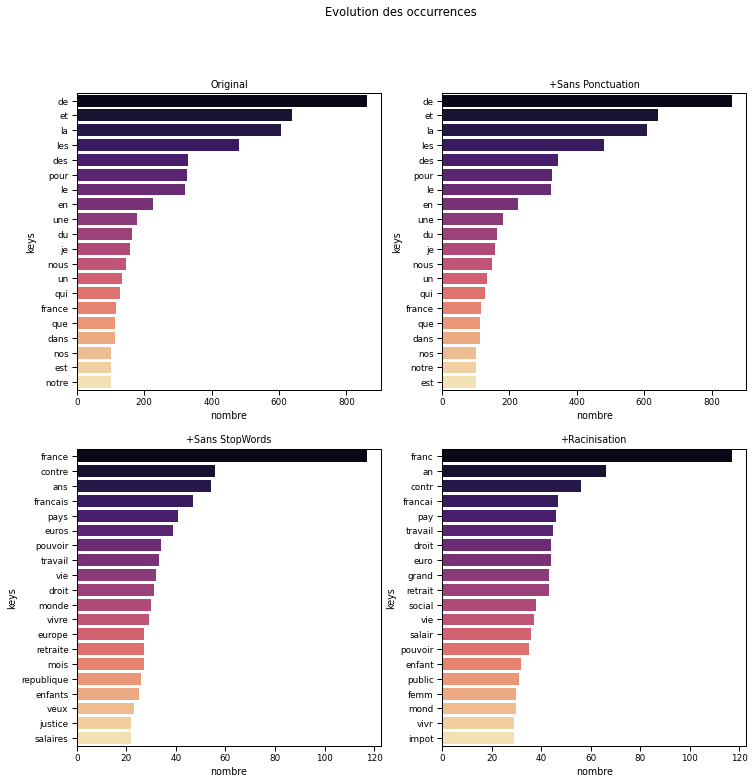

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_context('paper')

def get_counts_vocabulaire(vect_dtm):
    vocabulaire = pd.concat([pd.Series(vect_dtm[1].toarray().sum(axis=0)),pd.Series(vect_dtm[0].get_feature_names_out())],axis=1)
    vocabulaire.columns = ["nombre","keys"]
    vocabulaire = vocabulaire.sort_values(by=["nombre"],ascending = False)
    vocabulaire = vocabulaire.iloc[:20,]
    return vocabulaire

vocabulaires = [get_counts_vocabulaire(voc) for voc in vect_dtms] 
labels = ["Original","+Sans Ponctuation","+Sans StopWords","+Racinisation"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12), facecolor = None)
fig.suptitle('Evolution des occurrences')
for axe, voc, lab in zip(axes.flat, vocabulaires, labels):
    sns.barplot(ax = axe, y = 'keys', x = 'nombre', data = voc, palette = 'magma')
    axe.set_title(lab) 

### Nombre de mots par programme

In [59]:
vect_dtms[3]

[CountVectorizer(),
 <12x2662 sparse matrix of type '<class 'numpy.int64'>'
 	with 5563 stored elements in Compressed Sparse Row format>]

In [62]:
data["total_mots_ss_stopw"] = vect_dtms[2][1].toarray().sum(axis=1)
data["total_mots_stem"] = vect_dtms[3][1].toarray().sum(axis=1)

In [63]:
data["total_mots_ss_stopw"]

0     723
1     560
2     669
3     624
4     956
5     657
6     861
7     661
8     721
9     568
10    537
11    702
Name: total_mots_ss_stopw, dtype: int64

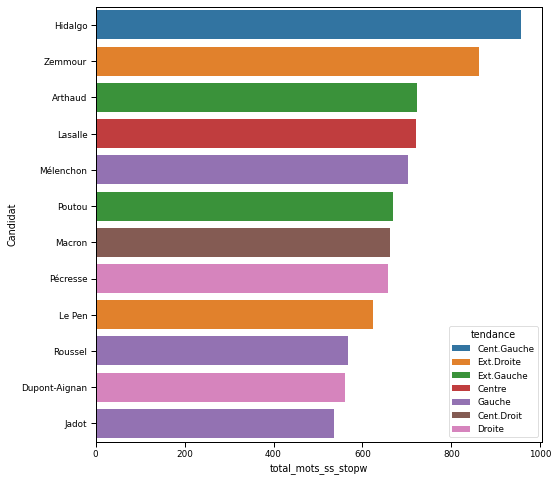

In [66]:
plt.figure(figsize = (8, 8), facecolor = None) 
sns.despine(left=True)
sns.barplot(
    y = 'Candidat', x = 'total_mots_ss_stopw', data = data.sort_values("total_mots_ss_stopw", ascending=False),
    hue = 'tendance', dodge = False)
plt.show()

### Les dix mots les plus fréquents pour chaque candidat

In [91]:
freq_by_cand = list()
for i in range(12):
    all_words = pd.DataFrame(
            {
            "Candidat": data.Candidat[i],
            "word": pd.Series(vect_dtms[2][0].get_feature_names_out()),
            "freq": pd.Series(vect_dtms[2][1][i,].toarray().sum(axis=0))
            }
    ).sort_values("freq",ascending=False)
    freq_by_cand.append(all_words.head(10))
data_freq_by_cand = pd.concat(freq_by_cand,axis=0)

In [99]:
data_freq_by_cand.shape

(120, 3)

In [100]:
data_freq_by_cand.head()

,Candidat,word,freq
3089,Arthaud,travailleurs,18
1205,Arthaud,faut,8
2763,Arthaud,salaires,6
1131,Arthaud,euros,6
624,Arthaud,contre,6


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


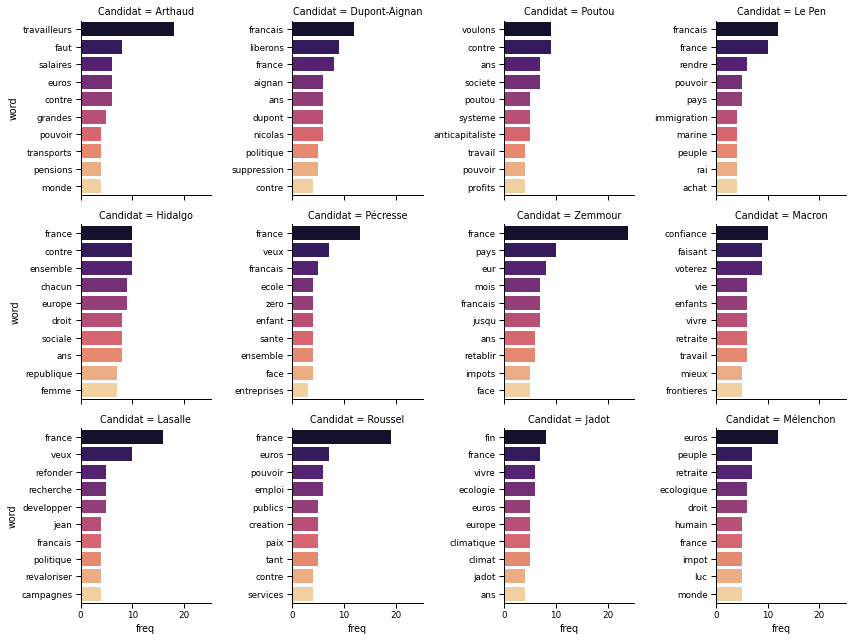

In [102]:
g = sns.FacetGrid(
    data_freq_by_cand,
    col="Candidat", col_wrap=4,
    sharey=False
)
g.map(sns.barplot, 'freq', 'word', palette = 'magma')

## Nuages de mots

In [34]:
from wordcloud import WordCloud
#import matplotlib.pyplot as plt 

In [35]:
def make_wordcloud(var_text, candidat):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(data[var_text][candidat])
    return wordcloud

### Evolution d'un nuage de points par étapes de nettoyage

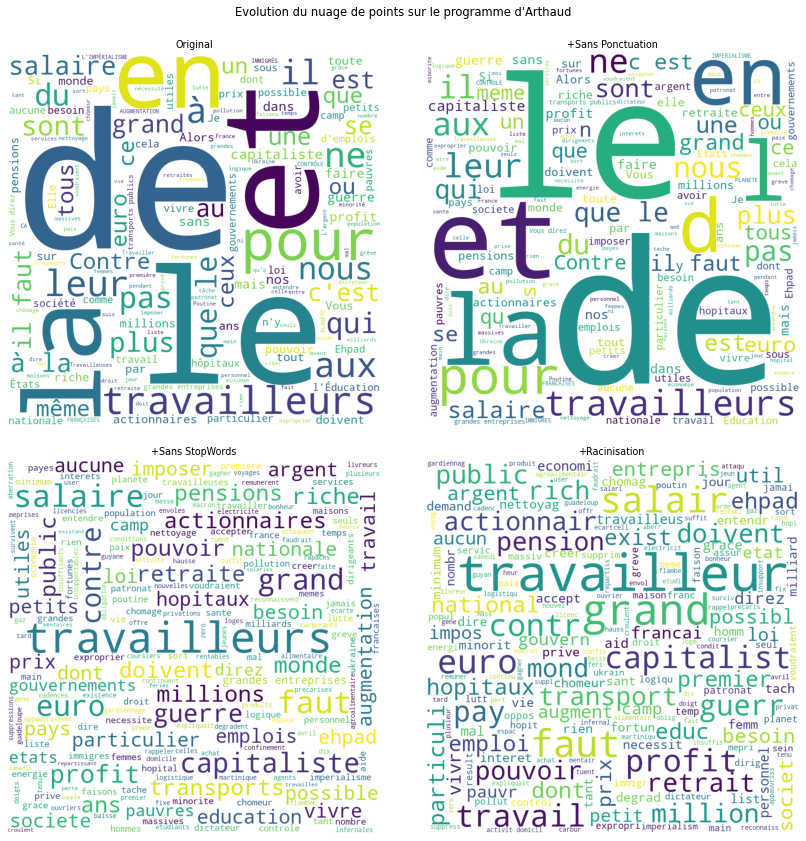

In [20]:
wordclouds_arthaud = [make_wordcloud(var, 0) for var in var_progs]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12), facecolor = None)
fig.suptitle('Evolution du nuage de points sur le programme d\'Arthaud')
for ax,wdcd,lab in zip(axes.flat,wordclouds_arthaud,labels):
    ax.imshow(wdcd)
    ax.set_title(lab) 
    ax.axis("off") 
fig.tight_layout(pad = 2) 

plt.show() 

### Comparaison des 12 nuages de points 

In [76]:
wordclouds_all = [make_wordcloud("prog_ss_stopw", i) for i in range(data.shape[0])]

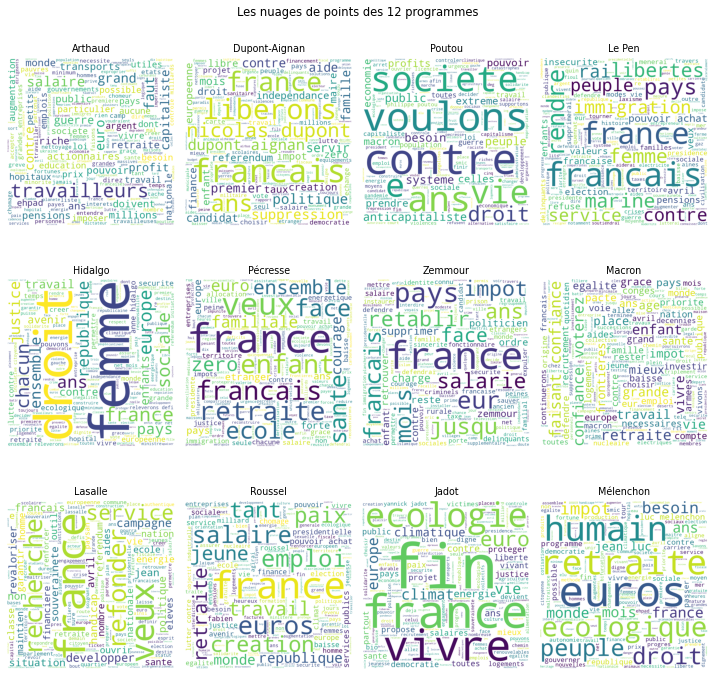

In [77]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,10), facecolor = None)
fig.suptitle('Les nuages de points des 12 programmes')
for ax,wdcd,cand in zip(axes.flat,wordclouds_all,data.Candidat):
    ax.imshow(wdcd)
    ax.set_title(cand) 
    ax.axis("off") 
fig.tight_layout(pad = 1) 
plt.savefig('nuages_ss_stopw.png')
plt.show() 